In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Dataset: diabetes data.
Age: 13-level age category (_AGEG5YR see codebook)

1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older

GenHlth: 1 for best general health, 5 for worst.

In [ ]:
# load dataset
from google.colab import drive
drive.mount('/content/drive')
# df = pd.read_csv('/content/diabetes_data.csv')
df = pd.read_csv('/content/drive/MyDrive/datasets/diabetes_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# display data
pd.set_option('display.max_columns', None)
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
#Describe the data
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Diabetes', ylabel='Age'>

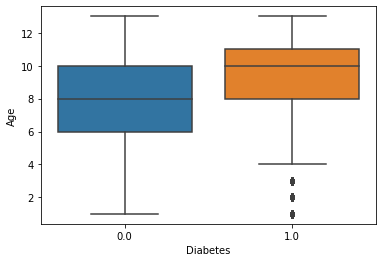

In [ ]:
sns.boxplot(x='Diabetes', y='Age', data=df)

<Axes: >

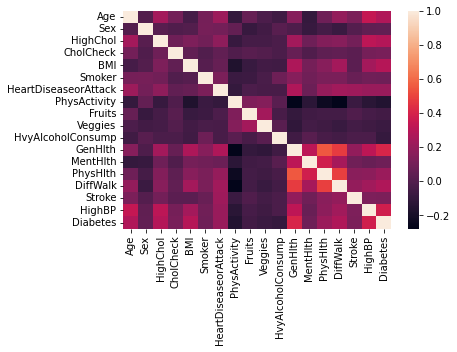

In [ ]:
# correlation plot
diabetes_correlations = df.corr()['Diabetes']
sns.heatmap(df.corr())

# We notice the greatest correlation to being diabetic in General Health
# physical health, Age, High cholesterol, BMI, High BP, Heart disease, 
# and difficulty to walk all seem to have some positive correlation.
# Fruits, Veggies and Hvy alcohol consumption seem to have negative or no correlation

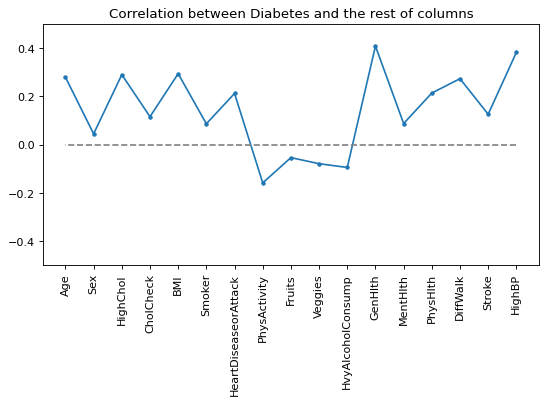

In [ ]:
# correlation scatter plot
plt.figure(figsize=(8,4), dpi=80)
plt.xticks(rotation=90)
plt.ylim(-0.5, 0.5)
plt.plot(df.corr()['Diabetes'][:-1], '.-')
plt.plot([len(df.columns)-2,0], [0,0], '--', color='gray')
plt.title("Correlation between Diabetes and the rest of columns")
plt.show()

# This graph helps to see more clear the correlation between Diabates and the rest



Text(0.5, 1.0, 'Smoker diabetics')

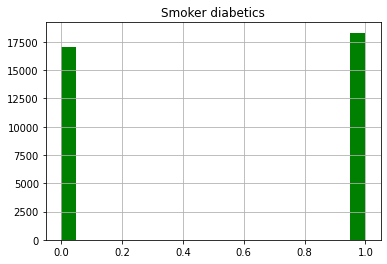

In [ ]:
diabetics = df[df['Diabetes']==1.0]
diabetics['Smoker'].hist(bins=20, color='green')
plt.title('Smoker diabetics')

# More smokers seem to have turned out diabetics than non smokers, but not by a significant differenceva.

Text(0.5, 1.0, 'General health of diabetics')

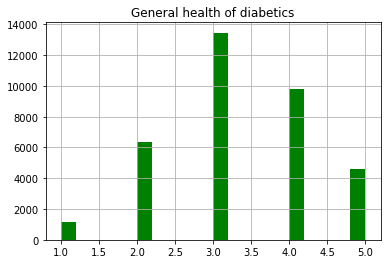

In [ ]:
diabetics['GenHlth'].hist(bins=20, color='green')
plt.title('General health of diabetics')

# Most diabetics had level 3 or worse of General health,
# with some exceptions on level 2 and very few outliers on 1.

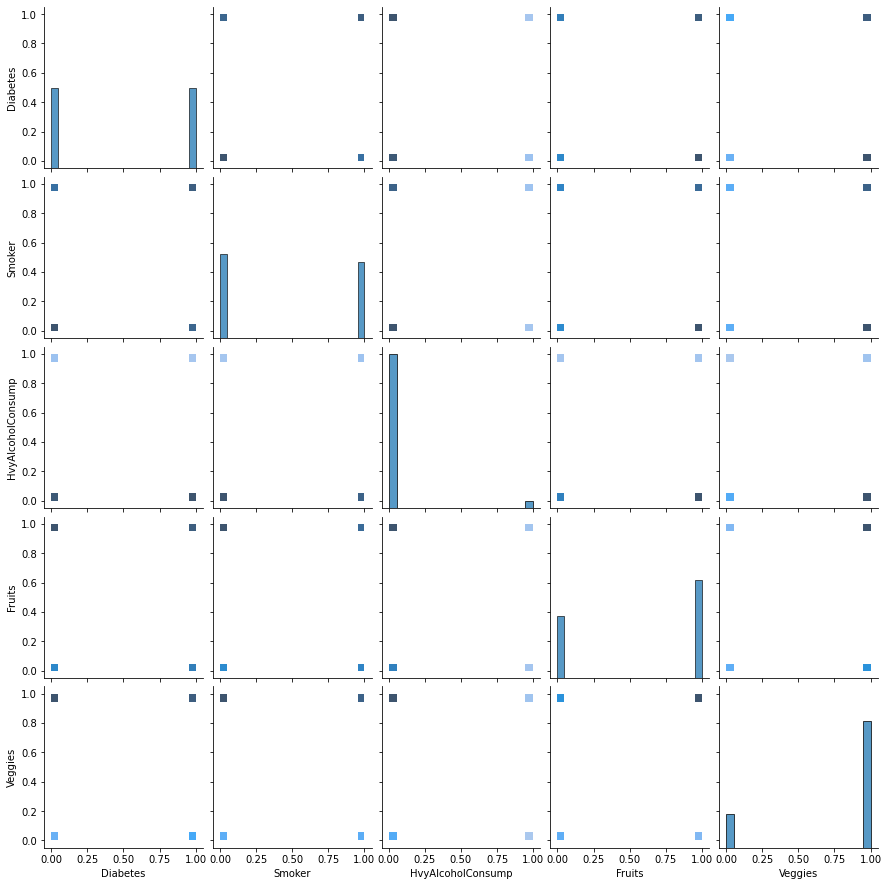

In [ ]:
# from pandas.tools.plotting import scatter_matrix
#from pandas.plotting import scatter_matrix
diabetics = df[df['Diabetes']==1.0]
non_diabetics = df[df['Diabetes']==0.0]
lifeStyle_means = df[['Diabetes', 'Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']].mean()

my_df = df.melt('Diabetes', var_name='LifeStyle', value_name='values')
sns.pairplot(df[['Diabetes', 'Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']], kind='hist')
#scatter_matrix(df[['Diabetes', 'Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']], 
#scatter_matrix(df[['Diabetes', 'GenHlth', 'Fruits', 'Veggies']], 
              # figsize = (12, 8), alpha = 1, diagonal='kde', estimator='mean')

# While visualization becomes difficult due to most data columns being binary
# it is possible to see which dots are more dense, for instance, there seem to be
# a lot of smokers and non smokers both as diabetics and non diabetics, which 
# makes it look like an unimportant column to consider.
# We can also notice how it seems that people who eat fruit are more likely to also eat veggies 


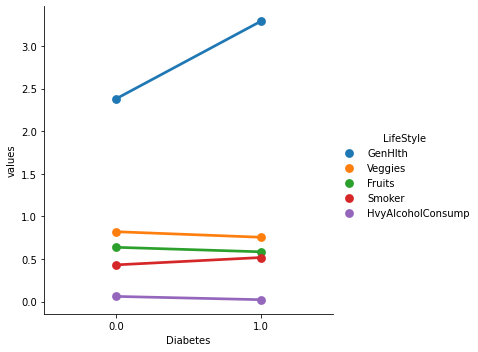

In [ ]:
# get veggies consumers, fruit consumers, smokers and heavy alcohol consumers
my_df = df[['Diabetes','GenHlth','Veggies','Fruits','Smoker','HvyAlcoholConsump']]
my_df = my_df.melt('Diabetes', var_name='LifeStyle', value_name='values')
sns.catplot(x='Diabetes', y='values', data=my_df, hue='LifeStyle', kind='point', estimator='mean')

# Using mean values in a categorial plot (with binaries instead of categorical vars.)
# it's easier to see how non diabetics seem to have an overall better general health
# Its also noticeable how smokers seem to be more likely to become diabetics.
# Heavy alcohol consumption, fruits and veggies make less of a difference.

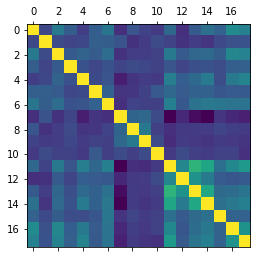

In [ ]:
plt.matshow(df.corr())

# Testing another correlation plot, we preffer seaborn because of it´s
# scale and row/column names.

<Axes: ylabel='Frequency'>

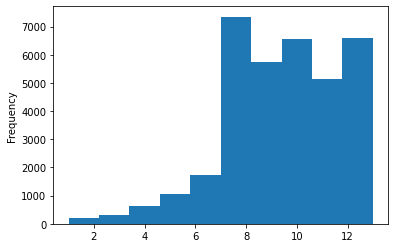

In [ ]:
df.loc[df['Diabetes'] == 1]['Age'].plot.hist()

# A much higher frequency of diabetics is noticed in older subjects.
# a great increase is noticed from age group 7 onwards.

<Axes: ylabel='Frequency'>

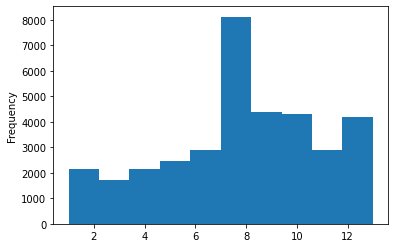

In [ ]:
df.loc[df['Diabetes'] == 0]['Age'].plot.hist()

# More non diabetics are also more frequent from age group 7 onwards
# indicating that maybe there are just more subjects of that age group.

<Axes: ylabel='Frequency'>

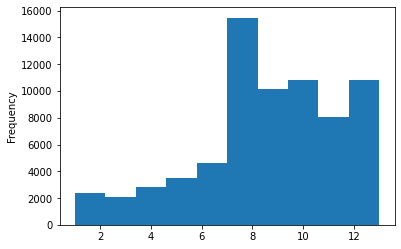

In [ ]:
df['Age'].plot.hist()

# As supposed after studying the past 2 plots.
# the dataset has way more subjects on groups 7 and older.

<Axes: xlabel='Diabetes', ylabel='GenHlth'>

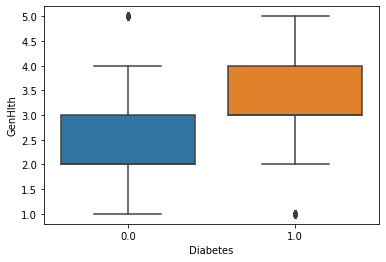

In [ ]:
sns.boxplot(x='Diabetes', y='GenHlth', data=df)

# Here we notice that in general more non diabetics have better general health
# with some outlying exceptions. We get the opposite case for diabetics.

Correlation with the Diabetes column